Here I shall be creating a model that predicts a linear relationship:

y = 2x + 1


In [ ]:
try:
    %tensorflow_version 2.x
except:
    pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Helper libraries
import numpy as np
import os
import matplotlib.pyplot as plt

# TensorFlow
import tensorflow as tf
 
print(tf.__version__)

2.9.2


[-2.44 -4.96  7.64 ...  2.97  0.77  2.02]
[-3.88 -8.92 16.28 ...  6.94  2.54  5.04]


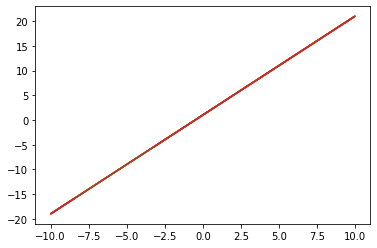

In [ ]:
X = np.arange(-10.0, 10.0, 1e-2)
np.random.shuffle(X)
print(X)

y =  2 * X + 1

print(y)

plt.plot(X, y)

train_end = int(0.6 * len(X))
#print (train_end)

test_start = int(0.8 * len(X))
#print (test_start)
X_train, y_train = X[:train_end], y[:train_end]
X_test, y_test = X[test_start:], y[test_start:]
X_val, y_val = X[train_end:test_start], y[train_end:test_start]

#print(X_train)
#print(y_train)
plt.plot(X_train, y_train)
plt.plot(X_test, y_test)
plt.plot(X_val, y_val)

In [ ]:
tf.keras.backend.clear_session()
linear_model = tf.keras.models.Sequential([
                                           tf.keras.layers.Dense(units=1, input_shape=[1], name='Single')
                                           ])
linear_model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.mean_squared_error)
linear_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Single (Dense)              (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We now train our model for 20 epochs. After 20 epochs, our model’s losses were around 2e-12 for training as well as validation. Then, we evaluate our model on the test data. Our test loss came out to be around 2e-12. You can try predicting some values to verify the results like I did here. The output I received is 15.866.

In [ ]:
linear_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)


Epoch 1/20
38/38 [==============================] - 1s 5ms/step - loss: 10.6393 - val_loss: 0.1878
Epoch 2/20
38/38 [==============================] - 0s 2ms/step - loss: 0.0996 - val_loss: 0.0403
Epoch 3/20
38/38 [==============================] - 0s 2ms/step - loss: 0.0219 - val_loss: 0.0086
Epoch 4/20
38/38 [==============================] - 0s 2ms/step - loss: 0.0046 - val_loss: 0.0018
Epoch 5/20
38/38 [==============================] - 0s 2ms/step - loss: 9.8421e-04 - val_loss: 3.9661e-04
Epoch 6/20
38/38 [==============================] - 0s 1ms/step - loss: 2.1252e-04 - val_loss: 8.5748e-05
Epoch 7/20
38/38 [==============================] - 0s 2ms/step - loss: 4.5249e-05 - val_loss: 1.8711e-05
Epoch 8/20
38/38 [==============================] - 0s 2ms/step - loss: 9.7720e-06 - val_loss: 3.9840e-06
Epoch 9/20
38/38 [==============================] - 0s 2ms/step - loss: 2.1111e-06 - val_loss: 8.5170e-07
Epoch 10/20
38/38 [==============================] - 0s 2ms/step - loss: 4.53

In [ ]:
print(linear_model.evaluate(X_test, y_test, verbose=0))
print(round(linear_model.predict([1.0]).tolist()[0][0], 4))    # expected: 15.886


1.735773851041511e-12
1/1 [==============================] - 0s 24ms/step
3.0


In [ ]:
export_path = 'linear_model/1/'
tf.saved_model.save(linear_model, os.path.join('/content/',export_path))

from google.colab import files
download_path = '/content/my_linear_model.zip'
!zip -r {download_path} {export_path}
files.download(download_path)

  adding: linear_model/1/ (stored 0%)
  adding: linear_model/1/saved_model.pb (deflated 86%)
  adding: linear_model/1/assets/ (stored 0%)
  adding: linear_model/1/variables/ (stored 0%)
  adding: linear_model/1/variables/variables.index (deflated 44%)
  adding: linear_model/1/variables/variables.data-00000-of-00001 (deflated 67%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>